<a href="https://colab.research.google.com/github/tonchan1216/bitbot/blob/master/notebook/make_data_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import copy

import seaborn as sns

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
target_list = ['random', 'qlearning', 'a2c']
base_path = '/content/drive/My Drive/Colab Notebooks/bitbot/result_data/'
initial_money=100000
mode = 'test'
df_fp = pd.DataFrame(columns=target_list)
df_wr = pd.DataFrame(columns=target_list)

for target in target_list:
  if target == 'random':
    df = pd.read_csv(base_path + target + '_test.csv')
  else:
    df = pd.read_csv(base_path + target + '_' + mode + '.csv')
  df['WinRate'] = df['TradeWin'] / df['TradeTimes'] * 100
  df['WinRate'] = df['WinRate'].fillna(0)
  df['WinRate'] = df['WinRate'].round(2)
  df['FixedProfitRate'] = ((df['FixedProfit']-initial_money) /initial_money) * 100
  df['FixedProfitRate'] = df['FixedProfitRate'].fillna(0)
  df['FixedProfitRate'] = df['FixedProfitRate'].round(2)
  df_fp[target] = df['FixedProfitRate']
  df_wr[target] = df['WinRate']

In [ ]:
df_fp_melted = pd.melt(df_fp).dropna()
df_wr_melted = pd.melt(df_wr).dropna()

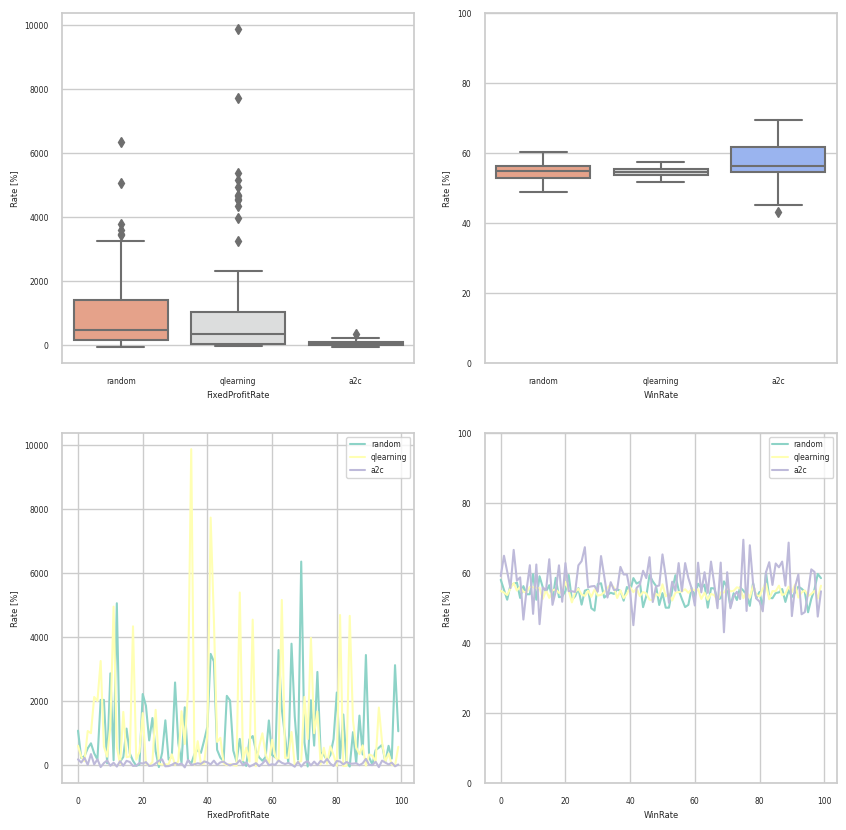

In [ ]:
plt.style.use('default')
sns.set(font_scale = 0.5)
sns.set_style('whitegrid')
sns.set_palette('Set3')

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2, 2, 1)
sns.boxplot(x='variable', y='value', data=df_fp_melted, palette='coolwarm_r', ax=ax1)
ax1.set_xlabel('FixedProfitRate')
ax1.set_ylabel('Rate [%]')

ax2 = fig.add_subplot(2, 2, 2)
sns.boxplot(x='variable', y='value', data=df_wr_melted, palette='coolwarm_r', ax=ax2)
ax2.set_xlabel('WinRate')
ax2.set_ylabel('Rate [%]')
ax2.set_ylim(0, 100)

ax3 = fig.add_subplot(2, 2, 3)
df_fp.plot(ax=ax3)
ax3.set_xlabel('FixedProfitRate')
ax3.set_ylabel('Rate [%]')
ax3.legend()

ax4 = fig.add_subplot(2, 2, 4)
df_wr.plot(ax=ax4)
ax4.set_xlabel('WinRate')
ax4.set_ylabel('Rate [%]')
ax4.set_ylim(0, 100)
ax4.legend()


plt.show()